# GRU

[인공지능 차세대 톱스타, 한국인 조경현 교수](https://brunch.co.kr/@hvnpoet/127)


<img src="https://d.pr/i/5xtgUb+" width="500"/>


**GRU(Gated Recurrent Unit)**는 RNN의 변형 구조 중 하나로, **LSTM(Long Short-Term Memory)**와 유사하지만 구조가 더 간단하다. GRU는 **게이트 구조**를 사용해 RNN의 **기울기 소멸 문제**를 해결하면서도, 연산량을 줄이고 효율적으로 학습할 수 있도록 설계되었다.(문제에 따라 LSTM보다 더 나은 경우도 있다.)


1. **단순화된 구조**
   - GRU는 LSTM에서 사용되는 **셀 상태(Cell State)**와 **은닉 상태(Hidden State)**를 하나로 통합하여 **은닉 상태(h)**만 유지한다.
   - LSTM의 3가지 게이트(망각, 입력, 출력 게이트) 대신, GRU는 **업데이트 게이트(Update Gate)**와 **리셋 게이트(Reset Gate)**의 2가지 게이트만 사용한다.

2. **장단기 의존성 처리**
   - GRU는 중요한 정보는 기억하고, 불필요한 정보는 잊는 과정을 통해 장기 의존성과 단기 의존성을 모두 처리할 수 있다.

3. **연산 효율성**
   - 구조가 단순하기 때문에 LSTM보다 계산량이 적고, 학습 속도가 더 빠르다.

**GRU의 게이트 구조**

1. **리셋 게이트 (Reset Gate)**  
   - 과거 정보를 **얼마나 잊을지** 결정한다.
   - 이전 은닉 상태가 현재 입력에 얼마나 반영될지를 제어한다.  
   - 수식:  
$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$

2. **은닉 상태 업데이트**  
   - 새로운 은닉 상태는 리셋 게이트를 적용한 이전 은닉 상태와 현재 입력 정보를 결합하여 생성된다.  
   - 수식:  
$$
\tilde{h}_t = \tanh(W_h \cdot [r_t \cdot h_{t-1}, x_t] + b_h)
$$

3. **업데이트 게이트 (Update Gate)**  
   - 정보의 **기억 여부**를 결정한다.
   - 이전 시점의 정보와 현재 입력 정보를 결합하여 다음 은닉 상태에 어떤 정보를 전달할지 제어한다.  
   - 수식:  
$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$



4. **최종 은닉 상태**  
   - 업데이트 게이트를 사용해 이전 은닉 상태와 새로운 은닉 상태를 조합하여 최종 은닉 상태를 계산한다.  
   - 수식:  
$$
h_t = (1 - z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t
$$

**GRU와 LSTM의 차이점**

| **특징**            | **LSTM**                                          | **GRU**                                  |
|----------------------|--------------------------------------------------|------------------------------------------|
| **게이트 수**        | 3개 (입력, 망각, 출력 게이트)                    | 2개 (업데이트 게이트, 리셋 게이트)              |
| **상태**            | 셀 상태(Cell State), 은닉 상태(Hidden State)      | 은닉 상태(Hidden State)만 사용           |
| **구조의 복잡성**   | 복잡함                                           | 단순함                                   |
| **계산량**          | 상대적으로 많음                                  | 상대적으로 적음                          |
| **성능 차이**        | 복잡한 시퀀스 데이터에 강점                      | 빠르고 간단한 시퀀스 데이터에 적합        |

In [19]:
import torch                                      # PyTorch 기본 라이브러리
import torch.nn as nn                             # 신경망 모듈 관련 클래스

batch_size = 2                                   # 한 번에 처리할 샘플 수  배치크기 B
seq_len = 3                                      # 시퀀스 길이 (타임스텝 수) T
input_size = 4                                   # 각 타임스텝의 입력 차원 F(I)
hidden_size = 5                                  # GRU 은닉 상태 차원 H

x = torch.randn(batch_size, seq_len, input_size) # 임의의 입력 시퀀스 생성 (B, T, I)
gru = nn.GRU(input_size, hidden_size, batch_first=True)  # GRU 레이어 정의 (batch 우선)  (B, T, *)

output, hidden = gru(x)                           # GRU에 입력을 넣어 출력과 은닉 상태 계산
print(output.shape)  # (batch_size, seq_len, hidden_size) 각 타임스텝의 출력
print(hidden.shape)  # (num_layers, batch_size, hidden_size) 마지막 타임스텝 은닉 상태

torch.Size([2, 3, 5])
torch.Size([1, 2, 5])


## IMDB 데이터셋

In [20]:
from tensorflow.keras.datasets import imdb          # Keras에서 제공하는 IMDB 감성분석 데이터셋 로드

vocab_size = 300                                    # 사용할 단어 사전 크기 (상위 300개 단어만 사용)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)  # 데이터 로드 및 train/test 분리
print(X_train.shape, y_train.shape)                 # 학습 데이터 입력/라벨 크기 출력
print(X_test.shape, y_test.shape)                   # 테스트 데이터 입력/라벨 크기 출력

c:\Users\Playdata\nlp\nlp_venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


(25000,) (25000,)
(25000,) (25000,)


### 리뷰데이터 디코드

In [21]:
# 단어사전 확인
word_index = imdb.get_word_index()                   # IMDB 데이터셋의 단어 → 인덱스 사전 로드
# index_word를 생성
index_from = 2                                      # 특수 토큰([PAD],[START],[UNK])을 위한 인덱스 오프셋
index_word = {index + index_from: word              # 인덱스 → 단어 형태로 변환
              for word, index in word_index.items() # 기존 단어 사전 순회
              if index <= vocab_size}               # vocab_size 이내 단어만 사용

index_word[0] = '[PAD]'                             # 패딩 토큰 추가
index_word[1] = '[START]'                           # 문장 시작 토큰 추가
index_word[2] = '[UNK]'                             # 미등록 단어 토큰 추가

index_word = dict(sorted(index_word.items(), key=lambda x: x[0]))  # 인덱스 기준으로 정렬
index_word                                       # 최종 인덱스 → 단어 사전 출력


{0: '[PAD]',
 1: '[START]',
 2: '[UNK]',
 3: 'the',
 4: 'and',
 5: 'a',
 6: 'of',
 7: 'to',
 8: 'is',
 9: 'br',
 10: 'in',
 11: 'it',
 12: 'i',
 13: 'this',
 14: 'that',
 15: 'was',
 16: 'as',
 17: 'for',
 18: 'with',
 19: 'movie',
 20: 'but',
 21: 'film',
 22: 'on',
 23: 'not',
 24: 'you',
 25: 'are',
 26: 'his',
 27: 'have',
 28: 'he',
 29: 'be',
 30: 'one',
 31: 'all',
 32: 'at',
 33: 'by',
 34: 'an',
 35: 'they',
 36: 'who',
 37: 'so',
 38: 'from',
 39: 'like',
 40: 'her',
 41: 'or',
 42: 'just',
 43: 'about',
 44: "it's",
 45: 'out',
 46: 'has',
 47: 'if',
 48: 'some',
 49: 'there',
 50: 'what',
 51: 'good',
 52: 'more',
 53: 'when',
 54: 'very',
 55: 'up',
 56: 'no',
 57: 'time',
 58: 'she',
 59: 'even',
 60: 'my',
 61: 'would',
 62: 'which',
 63: 'only',
 64: 'story',
 65: 'really',
 66: 'see',
 67: 'their',
 68: 'had',
 69: 'can',
 70: 'were',
 71: 'me',
 72: 'well',
 73: 'than',
 74: 'we',
 75: 'much',
 76: 'been',
 77: 'bad',
 78: 'get',
 79: 'will',
 80: 'do',
 81: 'also',
 

In [22]:
# 리뷰 디코드
print(X_train[0])                                  # 첫 번째 리뷰를 인덱스 시퀀스로 출력
decoded = ' '.join([index_word.get(seq, '?')       # 각 인덱스를 단어로 변환 (없으면 '?' 처리)
                    for seq in X_train[0]])        # 리뷰 시퀀스를 순회
print(decoded)                                     # 사람이 읽을 수 있는 문장으로 출력 


[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[START] that on as about [UNK] [UNK] [UNK] [UNK] really [UNK] [UNK] see [UNK] and again who each a are any about [UNK] life what [UNK] [UNK] br they [UNK] everything a though and part

In [23]:
# 메모리사용량 조절 train_size, test_size
train_size = 15000                                # 사용할 학습 데이터 개수 제한
test_size = 10000                                 # 사용할 테스트 데이터 개수 제한

X_train = X_train[:train_size]                    # 학습 입력 데이터 슬라이싱
y_train = y_train[:train_size]                    # 학습 라벨 데이터 슬라이싱
X_test = X_test[:test_size]                       # 테스트 입력 데이터 슬라이싱
y_test = y_test[:test_size]                       # 테스트 라벨 데이터 슬라이싱

print(X_train.shape, y_train.shape)               # 축소된 학습 데이터 크기 확인
print(X_test.shape, y_test.shape)                 # 축소된 테스트 데이터 크기 확인


(15000,) (15000,)
(10000,) (10000,)


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
# torch tensor 변환
X_train = [torch.tensor(seq, dtype=torch.long) for seq in X_train]  # 학습 입력 시퀀스를 Long 타입 텐서로 변환
X_test = [torch.tensor(seq, dtype=torch.long) for seq in X_test]    # 테스트 입력 시퀀스를 Long 타입 텐서로 변환

# 라벨데이터 2차원으로 준비
y_train = torch.tensor(y_train, dtype=torch.float).unsqueeze(1)     # 학습 라벨을 (N, 1) 형태로 변환
y_test = torch.tensor(y_test, dtype=torch.float).unsqueeze(1)       # 테스트 라벨을 (N, 1) 형태로 변환

print(y_train.shape)
print(y_test.shape)


torch.Size([15000, 1])
torch.Size([10000, 1])


In [26]:
# 패딩처리
import torch.nn.functional as F                    # 패딩 등 텐서 연산 함수 모듈

seq_len = 100                                      # 모든 시퀀스를 맞출 최대 길이

def pad_sequences(sequences, max_len):
    padded_sequences = []                          # 패딩된 시퀀스를 저장할 리스트
    for seq in sequences:                          # 각 시퀀스 순회
        if len(seq) < max_len:                     # 시퀀스가 최대 길이보다 짧으면
            padded_seq = F.pad(seq,                # 부족한 길이만큼 0으로 패딩
                               (0, max_len - len(seq)),
                               value=0)
        else:
            padded_seq = seq[:max_len]             # 길면 max_len까지만 자르기
        padded_sequences.append(padded_seq)        # 결과 시퀀스 저장
    return torch.stack(padded_sequences)           # 리스트를 하나의 텐서로 변환

X_train_padded = pad_sequences(X_train, seq_len)   # 학습 데이터 패딩 적용
X_test_padded = pad_sequences(X_test, seq_len)     # 테스트 데이터 패딩 적용

X_train_padded.shape, X_test_padded.shape          # 패딩 후 텐서 크기 확인


(torch.Size([15000, 100]), torch.Size([10000, 100]))

## GRU 모델

In [ ]:
# 모델 생성
class GRUSentimentNet(nn.Module):                   # GRU 기반 감성분석 모델 정의
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()                          # nn.Module 초기화
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)  # 단어 임베딩 레이어 (PAD=0) embedding_dim, 단어 하나당 차원
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)           # GRU 레이어 정의
        self.fc = nn.Linear(hidden_dim, 1)          # 이진 분류용 출력 레이어

    def forward(self, x):
        x = self.embedding(x)                       # 단어 인덱스를 임베딩 벡터로 변환
        output, hidden = self.gru(x)                # GRU 통과 (전체 출력, 마지막 은닉 상태)
        output = self.fc(hidden[-1])                # 마지막 은닉 상태로 예측값 계산
        return output                               # 최종 로짓 출력

model = GRUSentimentNet(vocab_size, embedding_dim=100, hidden_dim=16)  # 모델 인스턴스 생성
model                                              # 모델 구조 출력


GRUSentimentNet(
  (embedding): Embedding(300, 100, padding_idx=0)
  (gru): GRU(100, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [28]:
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 100])
gru.weight_ih_l0 torch.Size([48, 100])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])
fc.weight torch.Size([1, 16])
fc.bias torch.Size([1])


In [29]:
%pip install torchinfo -q

from torchinfo import summary

# embedding 30000 = 300 * 100
# gru 5664 = (100 * 16 + 16 + 16 * 16 + 16) * 3
# fc 17 = 16 * 1 + 1
summary(model)

Note: you may need to restart the kernel to use updated packages.


Layer (type:depth-idx)                   Param #
GRUSentimentNet                          --
├─Embedding: 1-1                         30,000
├─GRU: 1-2                               5,664
├─Linear: 1-3                            17
Total params: 35,681
Trainable params: 35,681
Non-trainable params: 0

## GRU 양방향 모델

In [30]:
# 모델 생성
class BiGRUSentimentNet(nn.Module):                     # 양방향 GRU 기반 감성분석 모델 정의
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()                              # nn.Module 초기화
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)  # 단어 임베딩 레이어
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)  # 양방향 GRU
        self.fc = nn.Linear(hidden_dim * 2, 1)          # forward+backward 은닉 상태 결합 후 출력

    def forward(self, x):
        x = self.embedding(x)                           # 단어 인덱스를 임베딩 벡터로 변환
        output, hidden = self.gru(x)                    # 양방향 GRU 통과

        forward_pass = hidden[-2]                       # 정방향 GRU의 마지막 은닉 상태
        backward_pass = hidden[-1]                      # 역방향 GRU의 마지막 은닉 상태
        hidden_merged = torch.cat((forward_pass, backward_pass), dim=1)  # 두 은닉 상태 결합

        output = self.fc(hidden_merged)                 # 결합된 은닉 상태로 예측
        return output                                   # 최종 로짓 출력

model = BiGRUSentimentNet(vocab_size, embedding_dim=100, hidden_dim=16)  # 모델 인스턴스 생성
model                                              # 모델 구조 출력


BiGRUSentimentNet(
  (embedding): Embedding(300, 100, padding_idx=0)
  (gru): GRU(100, 16, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [31]:
for name, param in model.named_parameters():
    print(name, param.shape)

embedding.weight torch.Size([300, 100])
gru.weight_ih_l0 torch.Size([48, 100])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])
gru.weight_ih_l0_reverse torch.Size([48, 100])
gru.weight_hh_l0_reverse torch.Size([48, 16])
gru.bias_ih_l0_reverse torch.Size([48])
gru.bias_hh_l0_reverse torch.Size([48])
fc.weight torch.Size([1, 32])
fc.bias torch.Size([1])


In [32]:
%pip install torchinfo -q

from torchinfo import summary

# embedding 30000 = 300 * 100
# gru 11,328 = (100 * 16 + 16 + 16 * 16 + 16) * 3 * 2
# fc 17 = 2 * 16 * 1 + 1
summary(model)

Note: you may need to restart the kernel to use updated packages.


Layer (type:depth-idx)                   Param #
BiGRUSentimentNet                        --
├─Embedding: 1-1                         30,000
├─GRU: 1-2                               11,328
├─Linear: 1-3                            33
Total params: 41,361
Trainable params: 41,361
Non-trainable params: 0

In [ ]:
# 학습데이터 준비
# - one-hot vector 대신 embedding vector를 사용하므로, 패딩처리된 학습데이터 사용
from torch.utils.data import random_split, DataLoader, TensorDataset  # 데이터셋 및 로더 관련 클래스

batch_size = 64                                  # 한 번에 학습할 배치 크기
train_size = int(len(X_train_padded) * 0.8)      # 학습 데이터 비율 (80%)
val_size = len(X_train_padded) - train_size      # 검증 데이터 비율 (20%)

train_dataset, val_dataset = \
    random_split(TensorDataset(X_train_padded, y_train), [train_size, val_size]) # 학습/검증 데이터셋 분리
test_dataset = TensorDataset(X_test_padded, y_test)  # 테스트 데이터셋 생성

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)   # 학습용 DataLoader
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)      # 검증용 DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)    # 테스트용 DataLoader


In [34]:
# 모델 학습 (gpu)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # GPU 사용 가능하면 cuda, 아니면 CPU
print('device: ', device)                                             # 사용 중인 디바이스 출력

# 메모리 캐시 정리
torch.cuda.empty_cache()                                              # GPU 캐시 메모리 초기화

# gpu vram으로 이동
model = model.to(device)                                              # 모델을 GPU/CPU로 이동

criterion = nn.BCEWithLogitsLoss()                                    # 이진 분류용 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)                # Adam 옵티마이저 설정

epochs = 100                                                          # 최대 학습 에폭 수

# 시각화를 위한 기록
train_losses, val_losses, train_accs, val_accs = [], [], [], []      # 손실/정확도 기록용 리스트

# 조기종료 관련
early_stopping_patience = 20                                          # 성능 개선 대기 에폭 수
best_val_loss = float('inf')                                          # 최적 검증 손실 초기값
early_stopping_counter = 0                                           # 조기종료 카운터

for epoch in range(epochs):
    total_loss, correct, total = 0, 0, 0                              # 에폭별 손실/정답/샘플 수 초기화

    model.train()                                                     # 학습 모드 전환
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)        # 입력/라벨을 GPU로 이동

        optimizer.zero_grad()                                         # 이전 gradient 초기화
        output = model(inputs)                                        # 순전파
        loss = criterion(output, labels)                              # 손실 계산
        loss.backward()                                               # 역전파
        optimizer.step()                                              # 가중치 업데이트

        total_loss += loss.item()                                     # 배치 손실 누적
        p = torch.sigmoid(output)                                     # 로짓 → 확률 변환
        pred = (p >= 0.5).float()                                     # 0.5 기준 이진 예측
        correct += (pred == labels).sum().item()                      # 맞춘 개수 누적
        total += labels.size(0)                                       # 전체 샘플 수 누적

    train_loss = total_loss / len(train_dataloader)                  # 에폭 평균 학습 손실
    train_losses.append(train_loss)                                   # 학습 손실 기록
    train_acc = correct / total                                       # 에폭 학습 정확도
    train_accs.append(train_acc)                                      # 학습 정확도 기록

    # 검증
    model.eval()                                                      # 평가 모드 전환
    val_loss, val_correct, val_total = 0, 0, 0                        # 검증용 변수 초기화
    with torch.no_grad():                                             # gradient 계산 비활성화
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)  # GPU 이동

            output = model(val_inputs)                                # 순전파
            loss = criterion(output, val_labels)                      # 손실 계산

            val_loss += loss.item()                                   # 검증 손실 누적
            p = torch.sigmoid(output)                                 # 확률 변환
            pred = (p >= 0.5).float()                                 # 이진 예측
            val_correct += (pred == val_labels).sum().item()          # 정답 개수 누적
            val_total += val_labels.size(0)                           # 전체 샘플 수 누적

    val_loss = val_loss / len(val_dataloader)                         # 에폭 평균 검증 손실
    val_losses.append(val_loss)                                       # 검증 손실 기록
    val_acc = val_correct / val_total                                 # 에폭 검증 정확도
    val_accs.append(val_acc)                                          # 검증 정확도 기록

    print(f'Epoch {epoch + 1}/{epochs}: '
          f'Train Loss {train_loss:.4f} Train Acc {train_acc:.4f} '
          f'Val Loss {val_loss:.4f} Val Acc {val_acc:.4f}')           # 에폭 로그 출력

    # 조기종료
    if val_loss < best_val_loss:                                      # 검증 손실이 개선되면
        best_val_loss = val_loss                                      # 최적 손실 갱신
        early_stopping_counter = 0                                    # 카운터 초기화
    else:
        early_stopping_counter += 1                                   # 개선 없으면 카운터 증가
        if early_stopping_counter >= early_stopping_patience:         # patience 초과 시
            print(f'Early stopped at Epoch {epoch + 1}...')           # 조기 종료 알림
            break                                                     # 학습 중단


device:  cpu
Epoch 1/100: Train Loss 0.6980 Train Acc 0.4998 Val Loss 0.6965 Val Acc 0.5020
Epoch 2/100: Train Loss 0.6941 Train Acc 0.5158 Val Loss 0.6947 Val Acc 0.5070
Epoch 3/100: Train Loss 0.6919 Train Acc 0.5271 Val Loss 0.6936 Val Acc 0.5143
Epoch 4/100: Train Loss 0.6900 Train Acc 0.5344 Val Loss 0.6923 Val Acc 0.5240
Epoch 5/100: Train Loss 0.6882 Train Acc 0.5399 Val Loss 0.6915 Val Acc 0.5337
Epoch 6/100: Train Loss 0.6865 Train Acc 0.5485 Val Loss 0.6903 Val Acc 0.5307
Epoch 7/100: Train Loss 0.6845 Train Acc 0.5561 Val Loss 0.6892 Val Acc 0.5437
Epoch 8/100: Train Loss 0.6826 Train Acc 0.5643 Val Loss 0.6883 Val Acc 0.5437
Epoch 9/100: Train Loss 0.6806 Train Acc 0.5658 Val Loss 0.6867 Val Acc 0.5507
Epoch 10/100: Train Loss 0.6785 Train Acc 0.5737 Val Loss 0.6854 Val Acc 0.5507
Epoch 11/100: Train Loss 0.6760 Train Acc 0.5818 Val Loss 0.6840 Val Acc 0.5510
Epoch 12/100: Train Loss 0.6738 Train Acc 0.5855 Val Loss 0.6824 Val Acc 0.5560
Epoch 13/100: Train Loss 0.6712 Trai

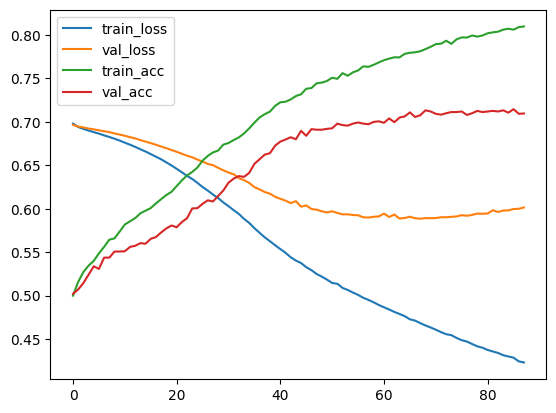

In [35]:
# 시각화
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs
})
df.plot()
plt.show()